## Project: Data Wrangling using Pandas and Regex

In this project you are asked __to implement__ and __perform a unit testing__ for a series of Python functions (Q1-Q13) that are typically required during the ***data wrangling*** phase of the end-to-end data science pipeline. A subset of unit testing functions is provided for you. You are expected to write unit testing for all the remaining functions.

__Data Wrangling consists of the following main steps:__

* Data Acquisition
* Data Cleansing
* Data Understanding: Basics
* Data Manipulation
  
  
__1. Data Acquisition Objectives__

* Question 1: How to import multiples files for storage and access? (store filenames in array)
* Question 2: How to import data in different formats? (read_excel, read_csv)
* Question 2: How are they read into by pandas? (DataFrame)
* Question 4: How to have a peek at the data after import? (head/tail)

__2. Data Cleansing Objectives__

* Question 5: Check attributes of each file
* Question 5: Identify data types
* Question 5: Apply coercion if applicable
* Question 5: Check for NA/missing data
* Question 6: Remove/replace corrupt data
* Question 6: Identify duplicate data
* Question 6: Check for corrupt/incorrect data  

* Check for data consistency (e.g. GPA cannot be less than 0)
* Identifying and removing outliers

__3. Data Understanding Objectives__

* Question 7: Basic Summary Statistics
* Question 9: Dimensionality

__4. Data Manipulation Objectives__

* Question 11: Merge/Concatenate DataFrame
* Question 11: Mapping to create a new attribute
* Question 11: Incorporate the use of multiple functions
* Question 12: Filter to subset the data
* Question 13: Discretize data 
  
  
__Regular Expressions:__ *Regular expressions are used in conjunction with other preprocessing steps for matching/parsing patterns.*

* Questions 2/5/6: Filter to subset the dataUse regular expressions to find/match specific content
* Question 6: Filter to subset the dataString manipulation via. substring and replace methods

## Install Required Packages

If you do not have Anaconda installed, then you may need to install the following packages using the following commands (Note: If you have Anaconda installed, then you already have Pandas and `regex`):

> pip3 install pandas  
  
> pip3 install regex

## INSTRUCTIONS: In all the functions, remove the `pass` statement and write your code.

In [209]:
import pandas as pd
import re
import glob
import copy
from pathlib import Path
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

### __Question 1: Write a function to import all excel file names into a list.__

_Hint: Use the glob module._

In [210]:
def Q1_function():
    """
    :type : None
    :rtype: List[String]
    """
    # TYPE YOUR CODE HERE
    filenames = []
    for filename in Path('data_raw').rglob('*.xlsx'):
        filenames.append(str(filename))
    
    return (filenames)


# Call the function and print the result. This result is used in subsequent questions.
filenames = Q1_function()
print(filenames)

['data_raw/Python-QUIZ Taxonomy of Python Data Structures (12 min.)-grades.xlsx', 'data_raw/Python-QUIZ Functions (18 min.)-grades.xlsx', 'data_raw/Python-QUIZ Coercion (6 min.)-grades.xlsx', 'data_raw/Python-QUIZ Strings (5 min.)-grades.xlsx', 'data_raw/Python-QUIZ Lists (10 min.)-grades.xlsx', 'data_raw/Python-QUIZ Iterations (6 min.)-grades.xlsx', 'data_raw/Python-QUIZ Sets (7 min)-grades.xlsx', 'data_raw/Python-QUIZ Exceptions (10 min.)-grades.xlsx', 'data_raw/Python-QUIZ Dictionaries (10 min.)-grades.xlsx', 'data_raw/Python-QUIZ Tuples (10 min.)-grades.xlsx', 'data_raw/Python-QUIZ Conditionals (6 min.)-grades.xlsx']


### __Question 2: Write a function to return the name of the excel file based on a given string. *(The string is defined for you)*__  
*Hints: Use the following.*
* Regex 're.search' function.
* Pandas function 'read_excel'

In [211]:
def Q2_function(files, s):
    """
    :type : List[String], String
    :rtype: String
    """
    # TYPE YOUR CODE HERE
    for file in files:
        if re.search(s, file):
            return file
        
    return ""
        

# Call the function and print the result. Use this to check the correctness of your code and for debugging.
file = Q2_function(filenames, s = "Dictionaries")
print(file)

data_raw/Python-QUIZ Dictionaries (10 min.)-grades.xlsx


### __Question 3: Write a function to load the "Functions" excel file into a Pandas DataFrame.__  
*Hint: Remember you have executed functions in Questions 1 and 2. Try using them here. You can save some coding time!*  
* Use the result from Question 1.
* Use the function written in Question 2.
* Use the Pandas function 'read_excel' to import an excel file.

In [212]:
def Q3_function(files, s):
    """
    :type : List[String], String
    :rtype: Pandas DataFrame
    """
    # TYPE YOUR CODE HERE
    file = Q2_function(files, s)
    df = pd.read_excel(file, index_col=None)
    df = df.drop('Unnamed: 0', axis=1)
    return df


# Call the function and print the result. This result is used in subsequent questions.
functions_df = Q3_function(filenames, s = "Functions")
print(functions_df)
# functions_df.head(3)

       State                  Started on                   Completed  \
0   Finished    February 5 2018  3:19 PM    February 5 2018  3:34 PM   
1   Finished    February 4 2018  4:01 PM    February 4 2018  4:19 PM   
2   Finished    February 6 2018  3:57 PM    February 6 2018  4:12 PM   
3   Finished   February 10 2018  4:05 PM   February 10 2018  4:23 PM   
4   Finished    February 4 2018  4:59 PM    February 4 2018  5:16 PM   
5   Finished    February 5 2018  5:20 PM    February 5 2018  5:38 PM   
6   Finished   February 10 2018  9:49 PM  February 10 2018  10:07 PM   
7   Finished    February 5 2018  8:30 PM    February 5 2018  8:48 PM   
8   Finished   February 13 2018  4:17 AM   February 13 2018  4:35 AM   
9   Finished   February 12 2018  2:19 PM   February 12 2018  2:35 PM   
10  Finished  February 13 2018  10:45 AM  February 13 2018  11:03 AM   
11  Finished   February 11 2018  1:48 AM   February 11 2018  2:06 AM   
12  Finished    February 5 2018  5:20 PM    February 5 2018  5:3

### __Question 4: Using the output obtained in Question 3 as input for the current question, write a function to do the following.__  
* Find all the names of the columns and return as a list.
* Find the subset of the DataFrame (use `df.loc`) and return the new DataFrame. Include the following columns:   
_"id", "Time taken", "Grade/45.00", "Q. 1 /5.00", "Q. 2 /10.00", "Q. 3 /6.00", "Q. 4 /6.00", "Q. 5 /12.00", "Q. 6 /6.00"_
* Return the top 10 rows (use `df.head function`).

Learn about returning multiple values in Python.

In [239]:
def Q4_function(dataframe):
    """
    :type : DataFrame
    :rtype: [String], DataFrame, DataFrame
    """
    # TYPE YOUR CODE HERE
    names = list(dataframe.columns.values)
    columns = ["id",
               "Time taken",
               "Grade/45.00",
               "Q. 1 /5.00",
               "Q. 2 /10.00",
               "Q. 3 /6.00",
               "Q. 4 /6.00",
               "Q. 5 /12.00",
               "Q. 6 /6.00"]

    df_subset = dataframe[columns]
    
    return names, df_subset, dataframe.head(10)
# Call the function and print the results. These results are used in subsequent questions.
names, df_subset, top_10 = Q4_function(functions_df)

print("Column Names")
print(names)
print()
print("Subsetted Data")
print(df_subset)
print()
print("Top 10 Rows")
print(top_10)

Column Names
['State', 'Started on', 'Completed', 'Time taken', 'Grade/45.00', 'Q. 1 /5.00', 'Q. 2 /10.00', 'Q. 3 /6.00', 'Q. 4 /6.00', 'Q. 5 /12.00', 'Q. 6 /6.00', 'id']

Subsetted Data
    id       Time taken  Grade/45.00  Q. 1 /5.00  Q. 2 /10.00  Q. 3 /6.00  \
0    0  14 mins 16 secs           32           5            6           6   
1    1  17 mins 54 secs           31           5            8           6   
2   12  15 mins 44 secs           20           3            4           3   
3    2          18 mins           30           5            6           6   
4    3  17 mins 31 secs           26           5            6           6   
5    4  17 mins 59 secs           25           5            6           6   
6    5          18 mins           24           5            6           6   
7    6          18 mins           23           5            6           0   
8    7    18 mins 1 sec           23           4            4           6   
9    8  16 mins 44 secs           22       

### Question 5: Using the subsetted DataFrame from the previous question, complete the following tasks.

* Identify the data type of every column. Return as a list. *(read about dtypes)*
* Strip all white spaces from the columns. 
    + try using list comprehension along with the 'sub' function in 're' module
* Check if 'Time taken' column has NA or empty values:
    + use `df.isnull().any()`. 
    + If YES, replace with 0: use `df.fillna()`.
* Using `regex` (`re.search`), convert the 'Time taken' column into seconds (int) and store in a new column called 'time' (e.g., convert __2 mins 10 secs__ into __130__. Note that to get 130, you need to do some math. Use coersion to convert str to int.
* Return the DataFrame with 'Time taken' column dropped.

In [241]:
def change_time_into_seconds(s):
    time = re.compile('((?P<minutes>[\d]+)\smin[s]?\s?)?((?P<seconds>[\d]+)\ssec[s]?\s?)?')
    match = time.match(s);
    time_dic = match.groupdict('0')
    seconds = int(time_dic['minutes']) * 60 + int(time_dic['seconds'])
    return seconds

def Q5_function(df):
    
    """
    :type : DataFrame
    :rtype: [String], DataFrame
    """
    types = df.dtypes.to_list()
        
    df.rename(columns=lambda x: re.sub(r" ", "", x), inplace=True)
    
    if df['Timetaken'].isnull().any():
        df['Timetaken'].fillna(0, inplace=True)
        
    df['time'] = df['Timetaken'].apply(lambda row: change_time_into_seconds(row))
    dataframe = df.drop('Timetaken', axis=1)
    
    return types, dataframe

# Call the function and print the results. These results are used in subsequent questions.
column_types, Q5_df = Q5_function(df_subset)
print("Column Datatypes")
print(column_types)
print()
print("New Update DataFrame")
print(Q5_df)

Column Datatypes
[dtype('int64'), dtype('O'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('O'), dtype('O'), dtype('O')]

New Update DataFrame
    id  Grade/45.00  Q.1/5.00  Q.2/10.00  Q.3/6.00 Q.4/6.00 Q.5/12.00  \
0    0           32         5          6         6     3.00     12.00   
1    1           31         5          8         6        -     12.00   
2   12           20         3          4         3        -     10.00   
3    2           30         5          6         6     3.00     10.00   
4    3           26         5          6         6     3.00      6.00   
5    4           25         5          6         6     6.00      2.00   
6    5           24         5          6         6     3.00      4.00   
7    6           23         5          6         0     0.00      6.00   
8    7           23         4          4         6     3.00      6.00   
9    8           22         4          4         6     0.00      8.00   
10   9           22         5

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### Question 6: Using the returned DataFrame from the previous question, complete the following tasks.

* Some columns might need to be converted to integer for the subsequent tasks. Identify which columns and convert them to int/float.
* Are there any duplicate rows? Remove them from the DataFrame.
* Data collected might be corrupt. Check whether data is missing or corrupt. Data is missing if there is a '-'. If missing data exists, replace with the mean of other values.
* With the above point in mind, find the mean values of all columns except 'id'. Append these as a row to your dataframe and return

*Hint: Note that the maximum marks for each column is different. Make sure you parse the information from the column name.*

In [275]:
def Q6_function(df):
    
    """
    :type : DataFrame
    :rtype: DataFrame
    """
    # TYPE YOUR CODE HERE
    df["Q.4/6.00"] = pd.to_numeric(df["Q.4/6.00"], errors='coerce')
    df["Q.5/12.00"] = pd.to_numeric(df["Q.5/12.00"], errors='coerce')
    df["Q.6/6.00"] = pd.to_numeric(df["Q.6/6.00"], errors='coerce')
    df["time"] = pd.to_numeric(df["time"], errors='coerce')
    df = df.drop_duplicates()
    df = df.fillna(df.mean())
    df.loc['mean'] = df.mean()
    return df


# Call the function and print the results.
Q6_df = Q6_function(Q5_df)
print(Q6_df)

        id  Grade/45.00  Q.1/5.00  Q.2/10.00  Q.3/6.00  Q.4/6.00  Q.5/12.00  \
0      0.0    32.000000  5.000000   6.000000  6.000000       3.0      12.00   
1      1.0    31.000000  5.000000   8.000000  6.000000       2.0      12.00   
2     12.0    20.000000  3.000000   4.000000  3.000000       2.0      10.00   
3      2.0    30.000000  5.000000   6.000000  6.000000       3.0      10.00   
4      3.0    26.000000  5.000000   6.000000  6.000000       3.0       6.00   
5      4.0    25.000000  5.000000   6.000000  6.000000       6.0       2.00   
6      5.0    24.000000  5.000000   6.000000  6.000000       3.0       4.00   
7      6.0    23.000000  5.000000   6.000000  0.000000       0.0       6.00   
8      7.0    23.000000  4.000000   4.000000  6.000000       3.0       6.00   
9      8.0    22.000000  4.000000   4.000000  6.000000       0.0       8.00   
10     9.0    22.000000  5.000000   8.000000  6.000000       3.0       5.75   
11    10.0    21.000000  5.000000  10.000000  6.0000

### Question 7: Use previously created functions to load the 'Exceptions' dataset as a dataframe

* Calculate the mean of the total grade obtained by the students.
* Calculate the standard deviation of the total grade obtained by the students.
* Calculate Q1,Q2 and Q3 (quantiles) for the total grade.
* Find the maximum and minimum values for the total grade

* Return all values rounded to 2 decimal places

*Hint: Use the df.describe function*

In [243]:
def Q7_function(file):
    """
    :type : String
    :rtype: Float
    """
    # TYPE YOUR CODE HERE
    df = Q3_function(filenames, s = file)
    data = df["Grade/21.00"].describe()
    
    
    return data['mean'].round(2), data['std'].round(2), data['25%'].round(2), data['50%'].round(2), data['75%'].round(2), data['max'].round(2), data['min'].round(2)

# Call the function and print the results.
mean_,std_,q1,q2,q3,max_,min_ = Q7_function(file="Exceptions")
print("Mean:", mean_)
print("Std. Dev.:", std_)
print("First Quantile", q1)
print("Second Quantile", q2)
print("Third Quantile", q3)
print("Max:", max_)
print("Min:", min_)

Mean: 14.83
Std. Dev.: 2.19
First Quantile 13.46
Second Quantile 14.66
Third Quantile 16.62
Max: 18.5
Min: 10.83


### Question 8: Create a boxplot of the grade distribution in the 'Exceptions' dataset.

* Compare the plot lines to the values calculated in the previous question.
* Use df.plot.box function.

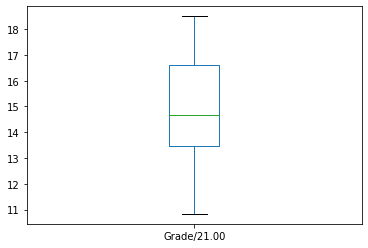

In [244]:
def Q8_function(file):
    
    """
    :type : String
    :rtype: Plot
    """
    
    df = Q3_function(filenames, file)
    Q8_plot = df[['Grade/21.00']].plot.box(return_type='axes')
    
    return Q8_plot


# Call the function. Plot will display.
Q8_function(file='Exceptions')

### Question 9: Return the number of rows and columns present in the 'Strings' dataset

* Use the `df.shape` attribute.

In [245]:
def Q9_function(file):
    
    """
    :type : String
    :rtype: list
    """ 
    # TYPE YOUR CODE HERE
    df = Q3_function(filenames, file)
    return df.shape


# Call the function and print the results
rows, columns = Q9_function (file='Strings')
print("Rows:",rows)
print("Columns:",columns)

Rows: 17
Columns: 7


### Question 10: Use the output from Question 5. Group the students based on their score in 'Q. 5 /12.00' column

* Which students scored 0 
* How many students achieved the maximum possible score
* Consider NA/missing values as 0

*Hint : Use groupby function.*


In [305]:
def Q10_function(df):
    
    """
    :type : DataFrame
    :rtype: list, int
    """ 
    
    df['Q.5/12.00'].fillna(0, inplace=True)
    
    zero = df[df['Q.5/12.00'] == 0]['id'].to_list()
    data = df.groupby(['Q.5/12.00']).size()
    max_score_counts = data.iloc[[-1]].to_list()[0]
    return zero, max_score_counts


# Call the function and print the results
zero, maximum = Q10_function(Q5_df)
print("Students scoring zero :",zero)
print("Number of students with maximum score :",maximum)

Students scoring zero : [9, 10, 13, 17, 18]
Number of students with maximum score : 2


### Question 11: Find out who ('id') has scored the maximum combined score in the 'Tuples' and 'Taxonomy' quiz.

* Use the `pd.merge()` function.
* Call the function you wrote for Question 5 to convert time and remove spaces in columns (will be used in later questions).
* Create a new column 'Total_score' which is the sum of the scores of the two quizzes.

In [247]:
def Q11_function():
    
    """
    :type : None
    :rtype: Dataframe, int
    """ 
    df1 = Q3_function(filenames, 'Tuples')
    df2 = Q3_function(filenames, 'Taxonomy')
    
    df = pd.merge(df1, df2, on='id', how='inner')
    
    df.rename(columns=lambda x: re.sub(r" ", "", x), inplace=True)
    df['time_x'] = df['Timetaken_x'].apply(lambda row: change_time_into_seconds(row))
    df['time_y'] = df['Timetaken_y'].apply(lambda row: change_time_into_seconds(row))
    data_frame_trimmed = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
    
    df['Total_score'] = df['Grade/20.00'] + df['Grade/21.00']
    max_score_id = df.loc[df['Total_score'].idxmax()]['id']
    
    return df, max_score_id


# Call the function and print the results. The DataFrame will be used in subsequent questions
Q11_df,max_scorer = Q11_function()
print("Max scorer :",max_scorer)

Max scorer : 10


### Question 12: Use the DataFrame generated in Question 11 and return the list of ids whose total time for both quizzes is less than than 20 minutes.

* Sort the list before returning.
* Can you code it in one line?

In [248]:
def Q12_function(df):
    
    """
    :type : DataFrame
    :rtype: list(int)
    """ 
    # TYPE YOUR CODE HERE
    return list(np.sort(df.loc[df['time_x'] + df['time_y'] < 1200, 'id'].values))


# Call the function and print the results.
ids = Q12_function(Q11_df)
print("ID of students :",ids)

ID of students : [3, 4, 7, 8, 12, 18]


### Question 13: Discretize the column 'Grade/45.00' for the DataFrame generated in Question 6 and create a new column. Find the number of people (id) per bin. Return a DataFrame with only the bins and count per bin.

*Hints:* 
* _Use 'cut' and 'groupby'._
* _Include the overall average in the groupings._
* _You won't need to use 'drop' to drop columns. Use groupby and check the result._
* _Use 5 bins_
* Don't consider 'Overall Average' row.

In [277]:
def Q13_function(df):
    
    """
    :type : DataFrame
    :rtype: DataFrame
    """
    new_df = df.drop(df.tail(1).index,inplace=False)
    count_per_bins = []
    bins = []
    bins_group = new_df.groupby(pd.cut(new_df["Grade/45.00"], 5))['id']
    
    for _bins,_ in bins_group:
        bins.append(_bins)
        count_per_bins.append(len(bins_group.get_group(_bins).values))
        
    df = pd.DataFrame(list(zip(bins, count_per_bins)), 
               columns =['bins', 'count']) 
        
    return df
    


# Call the function and print the results.
Q13_df = Q13_function(Q6_df)
print(Q13_df)

             bins  count
0  (12.981, 16.8]      4
1    (16.8, 20.6]      3
2    (20.6, 24.4]      7
3    (24.4, 28.2]      2
4    (28.2, 32.0]      3


### INSTRUCTIONS: Complete unit testing for the remaining functions to check correctness of your code.

In [311]:
import unittest

class TestNotebook(unittest.TestCase):
    def test_Q01_function(self):
        
        total_files = 11
        
        result = Q1_function()
        
        self.assertEqual(total_files, len(result))

    def test_Q02_function(self):
        
        ans='Python-QUIZ Lists (10 min.)-grades.xlsx'
        
        result=Q2_function(filenames, s = "Lists")
        
        #Handling removal of the path to check only filename
        self.assertEqual(ans,result.split("/")[-1].split("\\")[-1])
        
    def test_Q03_function(self):
        
        cols_ans=['State', 'Started on', 'Completed', 'Time taken', 'Grade/45.00', 'Q. 1 /5.00', 'Q. 2 /10.00', 'Q. 3 /6.00', 'Q. 4 /6.00', 'Q. 5 /12.00', 'Q. 6 /6.00', 'id']
        
        df = Q3_function(filenames, s = "Functions")
        
        self.assertEqual(cols_ans, list(df.columns.values))
        
    def test_Q04_function(self):
        
        cols_ans=['State', 'Started on', 'Completed', 'Time taken', 'Grade/45.00', 'Q. 1 /5.00', 'Q. 2 /10.00', 'Q. 3 /6.00', 'Q. 4 /6.00', 'Q. 5 /12.00', 'Q. 6 /6.00',  'id']
        subset_cols_ans= ["id", "Time taken", "Grade/45.00", "Q. 1 /5.00", "Q. 2 /10.00", "Q. 3 /6.00", "Q. 4 /6.00", "Q. 5 /12.00", "Q. 6 /6.00"]
        top_ans=10
        
        cols_result,subset_result,top_result=Q4_function(functions_df)

        self.assertEqual(cols_ans,list(cols_result))
        self.assertEqual(subset_cols_ans,list(subset_result.columns))
        self.assertEqual(top_ans,len(top_result))
        
    def test_Q05_function(self):
        
        cols_ans=['id', 'Grade/45.00', 'Q.1/5.00', 'Q.2/10.00', 'Q.3/6.00', 'Q.4/6.00', 'Q.5/12.00', 'Q.6/6.00', 'time']
        
        column_types, df = Q5_function(df_subset)

        self.assertEqual(10, len(column_types))
        self.assertEqual(cols_ans,list(df.columns))
        
    def test_Q06_function(self):

        df = Q6_function(Q5_df)
        
        #remove mean row
        df = df.drop(df.tail(1).index,inplace=False)
        self.assertEqual(0, len(df['id'])-len(df['id'].drop_duplicates()))
        
        
    def test_Q07_function(self):
        
        ans=(14.83,2.19,13.46,14.66,16.62,18.5,10.83) 
        
        result=Q7_function(file="Exceptions")
        
        self.assertEqual(ans, result)
        
    def test_Q09_function(self):

        rows, columns = Q9_function (file='Strings')
        
        self.assertEqual(17, rows)
        self.assertEqual(7, columns)
        
    def test_Q10_function(self):

        zero, maximum = Q10_function(Q5_df)
        
        self.assertEqual(5, len(zero))
        self.assertEqual(2, maximum)
        
        
    def test_Q11_function(self):

        Q11_df,max_scorer = Q11_function()
        self.assertEqual(10, max_scorer)

        
    def test_Q12_function(self):
        ans=[3, 4, 7, 8, 12, 18]   
        result=Q12_function(Q11_df)
        self.assertEqual(ans, result)
        
    def test_Q13_function(self):
        ans = [[15, 16, 17, 18], [12, 13, 14], [5, 6, 7, 8, 9, 10, 11], [3, 4], [0, 1, 2]]
        temp = Q13_function(Q6_df)
        result = temp['count'].tolist()
        
        for x in range(len(ans)):
            self.assertEqual(result[x], len(ans[x]))

        
unittest.main(argv=[''], verbosity=2, exit=False)

test_Q01_function (__main__.TestNotebook) ... ok
test_Q02_function (__main__.TestNotebook) ... ok
test_Q03_function (__main__.TestNotebook) ... /opt/anaconda3/lib/python3.7/site-packages/xlrd/xlsx.py:266: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
/opt/anaconda3/lib/python3.7/site-packages/xlrd/xlsx.py:312: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
ok
test_Q04_function (__main__.TestNotebook) ... ok
test_Q05_function (__main__.TestNotebook) ... /opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.o